# Manipulação de Áudio.

#### Este projeto tem como finalidade mostrar a manipulação de áudio utilizando as seguintes bibliotecas de Python abaixo na descrição do índice.
#### Base de dados: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
#### A Base de dados possui uma vasta gama de áudios que podem ser convertidos em ndarrays - Diferentes atores gravaram áudios com diferentes emoções.
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Índice:
#### scipy
#### pandas
#### numpy
#### matplotlib
#### IPython

In [30]:
from scipy.io import wavfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import IPython

## Demonstração de um áudio da Base da dados do Kaggle:

In [31]:
path = './kaggle/input/sample.wav'
rate, audio_data = wav.read(path) # Leitura do arquivo de áudio em ndarray
IPython.display.Audio(path)

C:\Users\User\AppData\Local\Temp\ipykernel_5420\1211357208.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, audio_data = wav.read(path) # Leitura do arquivo de áudio em ndarray


## Criar um DataFrame com os dados de áudio:

In [32]:
# Criar um DataFrame com os dados de áudio
df = pd.DataFrame({'Amostra': np.arange(len(audio_data)), 'Valor': audio_data})

# Exibir o DataFrame:
df

Amostra  Valor
0             0      0
1             1      0
2             2      0
3             3      0
4             4      0
...         ...    ...
158553   158553      0
158554   158554      0
158555   158555      0
158556   158556      0
158557   158557      0

[158558 rows x 2 columns]

## 1) Tópico de Amplitude:

In [33]:
def fator_amplitude(dados, fator):
    return dados*fator

In [34]:
# Criar uma nova coluna do DataFrame para modificar a amplitude do áudio original (Multiplicar por algum fator -- Fator de multiplicação para aumentar a amplitude):
df['amplitude'] = fator_amplitude(df['Valor'], 7)
df['amplitude'] = df['amplitude'].astype(np.int16)
df

Amostra  Valor  amplitude
0             0      0          0
1             1      0          0
2             2      0          0
3             3      0          0
4             4      0          0
...         ...    ...        ...
158553   158553      0          0
158554   158554      0          0
158555   158555      0          0
158556   158556      0          0
158557   158557      0          0

[158558 rows x 3 columns]

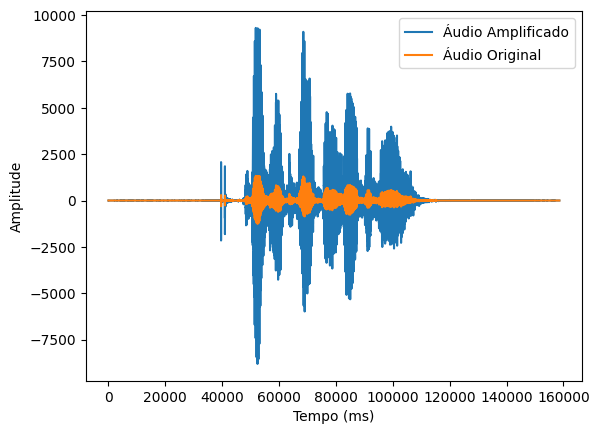

In [35]:
#Aumentar a amplitude => em aumentar o volume
plt.plot(df['Amostra'], df['amplitude'], label='Áudio Amplificado')
plt.plot(df['Amostra'], df['Valor'], label='Áudio Original')
plt.legend()
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.show()

#### Temos uma diferença na visualização dos dados de áudio em termos de amplitude, como mostrado no gráfico acima.

#### Áudio Original x Áudio Amplificado:

In [36]:
# Áudio Original
wavfile.write('audio_salvo.wav', rate, df['Valor'])
IPython.display.Audio('audio_salvo.wav')

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\io\wavfile.py:839: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  fid.write(data.ravel().view('b').data)


In [37]:
#Áudio Amplificado - Aumentar Volume (aumentar a amplitude)
wavfile.write('audio_salvo_amplificado.wav', rate, df['amplitude'])
IPython.display.Audio('audio_salvo_amplificado.wav')

#### Podemos concluir também que se aplicarmos um fator de amplitude que seja menor que o dos dados originais, obtemos um volume menor e portanto a saída de áudio será mais baixa.

# 2) Tópico de Frequência

#### Criando uma função para modificar a frequência dos áudios:

In [38]:
def nova_frequencia(frequencia, fator_multiplicativo):
    frequencia = int(frequencia*fator_multiplicativo)
    return frequencia

In [39]:
#Áudio original
wavfile.write('audio_salvo.wav', rate, df['Valor'])
IPython.display.Audio('audio_salvo.wav')

In [40]:
#Aumentar a frequência original por um fator de 2:
frequencia_2 = nova_frequencia(rate,2)
wavfile.write('audio_salvo_frequencia_2.wav', frequencia_2, df['Valor'])
IPython.display.Audio('audio_salvo_frequencia_2.wav')

In [41]:
#Diminuir a frequência original por um fator de 2:
frequencia_2 = nova_frequencia(rate,0.5)
wavfile.write('audio_salvo_frequencia_meia.wav', frequencia_2, df['Valor'])
IPython.display.Audio('audio_salvo_frequencia_meia.wav')

#### Podemos notar que ao modificar a frequência do áudio original, a resultante é um áudio mais acelerado e agudo, no caso de aumentar a frequência, e no caso de diminuir a frequência, temos um áudio mais grave e de maior duração em segundos.

## 3) Tópico de Função de Ruído

#### Criando a função de ruído:

In [42]:
def adicionar_ruido(audio_data, amplitude_ruido):
    ruido = np.random.uniform(-amplitude_ruido, amplitude_ruido, len(audio_data))
    return audio_data + ruido

In [43]:
# Adicionar o Rúido no DataFrame:
df['ruido'] = adicionar_ruido(df['Valor'], 500)
df['ruido'] = df['ruido'].astype(np.int16) # É necessário que o dado fique no formato int16 para a biblioteca IPython poder fazer a leitura dos dados.
df


Amostra  Valor  amplitude  ruido
0             0      0          0    269
1             1      0          0   -346
2             2      0          0   -395
3             3      0          0    147
4             4      0          0     87
...         ...    ...        ...    ...
158553   158553      0          0     44
158554   158554      0          0    316
158555   158555      0          0    336
158556   158556      0          0   -470
158557   158557      0          0    327

[158558 rows x 4 columns]

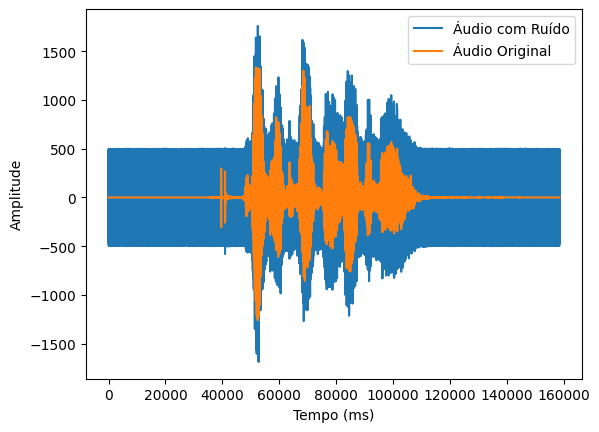

In [44]:
#Visualizar Ruídos:
plt.plot(df['Amostra'], df['ruido'], label='Áudio com Ruído')
plt.plot(df['Amostra'], df['Valor'], label='Áudio Original')
plt.legend()
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.show()

#### Áudio Original x Áudio com Ruído:

In [45]:
# Áudio Original
wavfile.write('audio_salvo.wav', rate, df['Valor'])
IPython.display.Audio('audio_salvo.wav')

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\io\wavfile.py:839: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  fid.write(data.ravel().view('b').data)


In [46]:
#Ouvir o ruído aleatório gerado:
wavfile.write('audio_salvo_ruido.wav', rate, df['ruido'])
IPython.display.Audio('audio_salvo_ruido.wav')

## 4) Tópico de Reversão de Áudio:

#### Criar a Reversão:

In [47]:
# Criar uma nova coluna do DataFrame do Áudio revertido:
df['reverso'] = df['Valor'].iloc[::-1].values
df

Amostra  Valor  amplitude  ruido  reverso
0             0      0          0    269        0
1             1      0          0   -346        0
2             2      0          0   -395        0
3             3      0          0    147        0
4             4      0          0     87        0
...         ...    ...        ...    ...      ...
158553   158553      0          0     44        0
158554   158554      0          0    316        0
158555   158555      0          0    336        0
158556   158556      0          0   -470        0
158557   158557      0          0    327        0

[158558 rows x 5 columns]

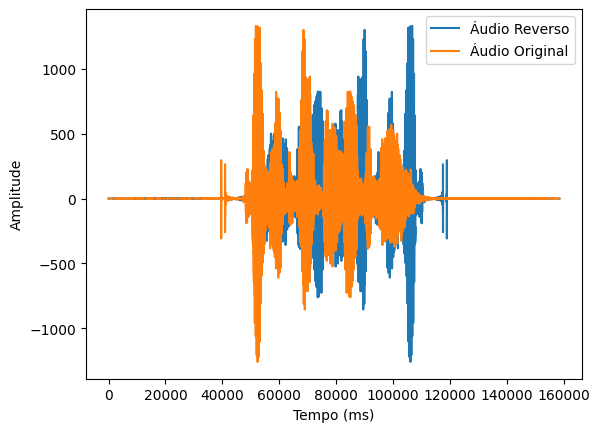

In [48]:
#Visualizar Reversão:
plt.plot(df['Amostra'], df['reverso'], label='Áudio Reverso')
plt.plot(df['Amostra'], df['Valor'], label='Áudio Original')
plt.legend()
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.show()

In [49]:
# Áudio Original
wavfile.write('audio_salvo.wav', rate, df['Valor'])
IPython.display.Audio('audio_salvo.wav')

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\io\wavfile.py:839: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  fid.write(data.ravel().view('b').data)


In [50]:
# Áudio Reverso:
wavfile.write('audio_salvo_reverso.wav', rate, df['reverso'])
IPython.display.Audio('audio_salvo_reverso.wav')

## 5) Comparar outros áudios (outros atores)

In [51]:
path = './kaggle/input/sample_3.wav'
rate_fem, audio_data_fem = wav.read(path) # Leitura do arquivo de áudio em ndarray
IPython.display.Audio(path)

C:\Users\User\AppData\Local\Temp\ipykernel_5420\2468033734.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate_fem, audio_data_fem = wav.read(path) # Leitura do arquivo de áudio em ndarray


In [52]:
# Criar um DataFrame com os dados de áudio
df_feminino = pd.DataFrame({'Amostra': np.arange(len(audio_data_fem)), 'Valor': audio_data_fem})

# Exibir o DataFrame do áudio feminino:
df_feminino

Amostra  Valor
0             0      0
1             1      0
2             2      0
3             3      0
4             4      0
...         ...    ...
172968   172968      0
172969   172969      0
172970   172970      0
172971   172971      0
172972   172972      0

[172973 rows x 2 columns]

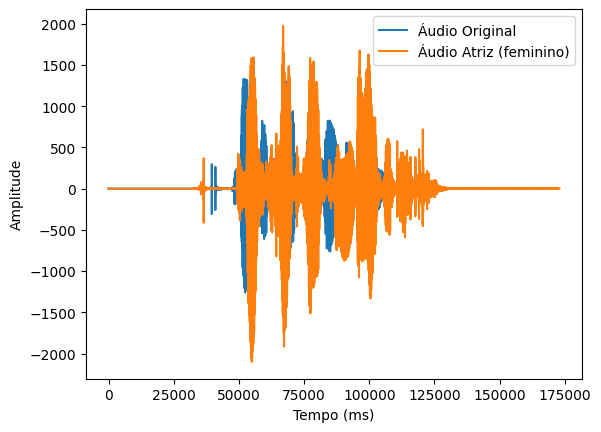

In [53]:
#Visualizar Comparação:
plt.plot(df['Amostra'], df['Valor'], label='Áudio Original')
plt.plot(df_feminino['Amostra'], df_feminino['Valor'], label='Áudio Atriz (feminino)')
plt.legend()
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.show()

In [54]:
# Áudio Feminino advindo do DataFrame
wavfile.write('audio_salvo_feminino.wav', rate_fem, df_feminino['Valor'])
IPython.display.Audio('audio_salvo_feminino.wav')

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\io\wavfile.py:839: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  fid.write(data.ravel().view('b').data)


In [55]:
# Somar as vozes Masculina e Feminina em uma nova coluna do DataFrame df:
df['soma_atores'] = df_feminino['Valor'] + df['Valor']
df['soma_atores'] = df['soma_atores'].astype(np.int16) # É necessário que o dado fique no formato int16 para a biblioteca IPython poder fazer a leitura dos dados.
df

Amostra  Valor  amplitude  ruido  reverso  soma_atores
0             0      0          0    269        0            0
1             1      0          0   -346        0            0
2             2      0          0   -395        0            0
3             3      0          0    147        0            0
4             4      0          0     87        0            0
...         ...    ...        ...    ...      ...          ...
158553   158553      0          0     44        0            0
158554   158554      0          0    316        0            0
158555   158555      0          0    336        0            0
158556   158556      0          0   -470        0            0
158557   158557      0          0    327        0            0

[158558 rows x 6 columns]

In [56]:
# Áudio Soma Feminino + Masculino (mesma frequência):
wavfile.write('audio_salvo_soma_atores.wav', rate, df['soma_atores'])
IPython.display.Audio('audio_salvo_soma_atores.wav')

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\io\wavfile.py:839: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  fid.write(data.ravel().view('b').data)


## 6) Comparar outros áudios (outras emoções do mesmo ator)

In [57]:
# Áudio do mesmo ator do áudio original, só que com outra emoção!
path = './kaggle/input/sample_2.wav'
rate, audio_data_emocao = wav.read(path) # Leitura do arquivo de áudio em ndarray
IPython.display.Audio(path)

C:\Users\User\AppData\Local\Temp\ipykernel_5420\1963491709.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, audio_data_emocao = wav.read(path) # Leitura do arquivo de áudio em ndarray


In [58]:
# Criar um DataFrame com os dados de áudio de outra emoção:
df_emocao = pd.DataFrame({'Amostra': np.arange(len(audio_data_emocao)), 'Valor': audio_data_emocao})

# Exibir o DataFrame do áudio feminino:
df_emocao

Amostra  Valor
0             0      0
1             1      0
2             2      0
3             3      0
4             4      0
...         ...    ...
192187   192187      0
192188   192188      0
192189   192189      0
192190   192190      0
192191   192191      0

[192192 rows x 2 columns]

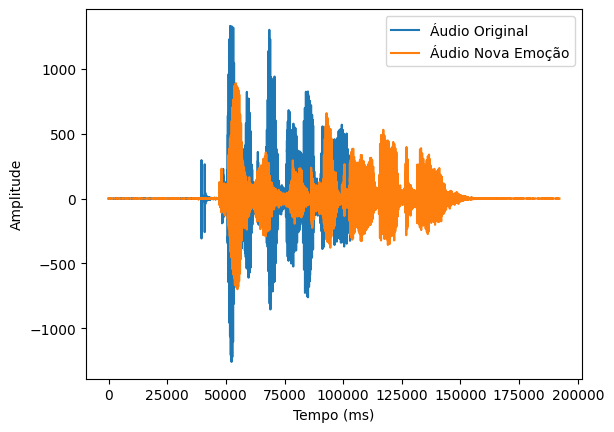

In [59]:
#Visualizar Comparação:
plt.plot(df['Amostra'], df['Valor'], label='Áudio Original')
plt.plot(df_emocao['Amostra'], df_emocao['Valor'], label='Áudio Nova Emoção')
plt.legend()
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude')
plt.show()

In [60]:
# Somar as vozes Masculina e Feminina em uma nova coluna do DataFrame df:
df['soma_emocao'] = df_emocao['Valor'] + df['Valor']
df['soma_emocao'] = df['soma_emocao'].astype(np.int16) # É necessário que o dado fique no formato int16 para a biblioteca IPython poder fazer a leitura dos dados.
df

Amostra  Valor  amplitude  ruido  reverso  soma_atores  soma_emocao
0             0      0          0    269        0            0            0
1             1      0          0   -346        0            0            0
2             2      0          0   -395        0            0            0
3             3      0          0    147        0            0            0
4             4      0          0     87        0            0            0
...         ...    ...        ...    ...      ...          ...          ...
158553   158553      0          0     44        0            0           -1
158554   158554      0          0    316        0            0            0
158555   158555      0          0    336        0            0            0
158556   158556      0          0   -470        0            0           -1
158557   158557      0          0    327        0            0            0

[158558 rows x 7 columns]

In [61]:
# Áudio Soma mesmo ator e emoções diferentes (mesma frequência):
wavfile.write('audio_salvo_soma_emocao.wav', rate, df['soma_emocao'])
IPython.display.Audio('audio_salvo_soma_emocao.wav')

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\io\wavfile.py:839: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  fid.write(data.ravel().view('b').data)


## 7) Convolução no Áudio Original

In [62]:
# Aplicar a convolução constante:
path = './kaggle/input/sample.wav'
rate, audio_data = wav.read(path) # Leitura do arquivo de áudio em ndarray
f_trans = np.poly1d([1], True)
df['convolucao'] = np.convolve(audio_data[1:], f_trans).astype(np.int16)

C:\Users\User\AppData\Local\Temp\ipykernel_5420\21301507.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, audio_data = wav.read(path) # Leitura do arquivo de áudio em ndarray


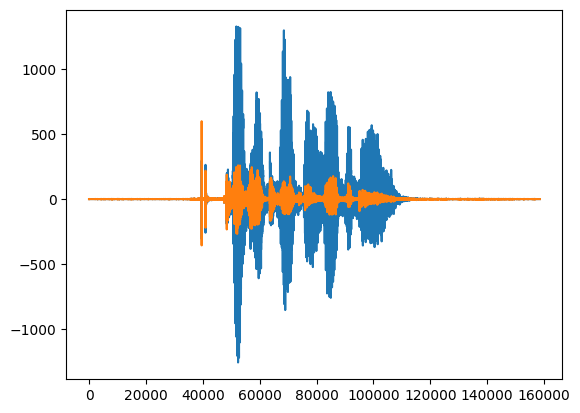

In [63]:
plt.plot(audio_data)
plt.plot(df['Amostra'], df['convolucao'])
plt.show()

In [64]:
# Áudio Original:
path = './kaggle/input/sample.wav'
rate, audio_data = wav.read(path) # Leitura do arquivo de áudio em ndarray
IPython.display.Audio(path)

C:\Users\User\AppData\Local\Temp\ipykernel_5420\3610609951.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, audio_data = wav.read(path) # Leitura do arquivo de áudio em ndarray


In [65]:
# Áudio Convolucionado:
wavfile.write('audio_salvo_conv.wav', rate, df['convolucao'])
IPython.display.Audio('audio_salvo_conv.wav')

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\io\wavfile.py:839: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  fid.write(data.ravel().view('b').data)


## Metadados dos áudios armazenados em DataFrame

In [84]:
#Criar o DataFrame para adicionar os dados de áudios em array (cada linha é respectivo a um áudio - Ator e emoção específica):
# Há 7 áudios Mockados para a análise e manipulação, porém o código pode ser elaborado para receber mais arquivos de áudios.

dic = {'freq': [], 'audio_data': []}
for i in ['','_2', '_3', '_4', '_5', '_6','_7']:
    path = f'./kaggle/input/sample{i}.wav'
    rate, audio_data = wav.read(path) # Leitura do arquivo de áudio em ndarray
    dic['freq'].append(rate)
    dic['audio_data'].append(audio_data)
print(dic)

# Criar um DataFrame com os dados de áudio
df_varios_dados = pd.DataFrame({'frequencia': dic['freq'], 'Valor': dic['audio_data']})

'''
A coluna Valor armazena os dados de áudio em um array. (cada linha corresponde a um áudio inteiro de um ator e uma emoção específica)
'''
# Exibir o DataFrame:
df_varios_dados

{'freq': [48000, 48000, 48000, 48000, 48000, 48000, 48000], 'audio_data': [array([0, 0, 0, ..., 0, 0, 0], dtype=int16), array([0, 0, 0, ..., 0, 0, 0], dtype=int16), array([0, 0, 0, ..., 0, 0, 0], dtype=int16), array([-1,  0, -1, ...,  0,  0,  0], dtype=int16), array([ 0,  0,  0, ..., -1, -1, -1], dtype=int16), array([4, 5, 4, ..., 0, 1, 0], dtype=int16), array([0, 0, 0, ..., 1, 1, 0], dtype=int16)]}


C:\Users\User\AppData\Local\Temp\ipykernel_5420\2132324658.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, audio_data = wav.read(path) # Leitura do arquivo de áudio em ndarray


frequencia                                              Valor
0       48000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1       48000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2       48000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3       48000  [-1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
4       48000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5       48000  [4, 5, 4, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 6, ...
6       48000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

In [67]:
#Cálculo da média das frequências:
df_varios_dados['media_freq'] = df_varios_dados['frequencia'].mean()
df_varios_dados

frequencia                                              Valor  media_freq
0       48000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     48000.0
1       48000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     48000.0
2       48000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     48000.0
3       48000  [-1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...     48000.0
4       48000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     48000.0
5       48000  [4, 5, 4, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 6, ...     48000.0
6       48000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     48000.0

In [77]:
#Cálculo da média das amplitudes:

# Converter as listas de valores em arrays numpy
df_varios_dados['Valor'] = df_varios_dados['Valor'].apply(np.array)

# Calcular a média das amplitudes
df_varios_dados['amplitude_media'] = df_varios_dados['Valor'].apply(lambda x: np.mean(x))

# Exibir o DataFrame atualizado
df_varios_dados

frequencia                                              Valor  media_freq  \
0       48000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     48000.0   
1       48000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     48000.0   
2       48000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     48000.0   
3       48000  [-1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...     48000.0   
4       48000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     48000.0   
5       48000  [4, 5, 4, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 6, ...     48000.0   
6       48000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     48000.0   

   amplitude_media  
0         0.029983  
1         0.026068  
2        -0.004694  
3        -0.040797  
4         0.085844  
5        -0.044301  
6         0.020784

In [82]:
#Calculo da amplitude Máxima e Mínima:

# Calcular a máxima das amplitudes:
df_varios_dados['amplitude_maxima'] = df_varios_dados['Valor'].apply(max)

# Calcular a mínima das amplitudes:
df_varios_dados['amplitude_minima'] = df_varios_dados['Valor'].apply(min)

# Exibir o DataFrame atualizado
df_varios_dados


frequencia                                              Valor  media_freq  \
0       48000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     48000.0   
1       48000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     48000.0   
2       48000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     48000.0   
3       48000  [-1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...     48000.0   
4       48000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     48000.0   
5       48000  [4, 5, 4, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 6, ...     48000.0   
6       48000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     48000.0   

   amplitude_media  amplitude_maxima  amplitude_minima  
0         0.029983              1330             -1259  
1         0.026068               889              -699  
2        -0.004694              1973             -2101  
3        -0.040797              2221             -1914  
4         0.085844               870              -645  
5        -0.044301               511              -532  
6         0.020784              3376             -2671

In [83]:
# Metadados do DataFrame são convertidos em .csv:
df_varios_dados.to_csv('arquivos_de_audio_metadados.csv')

# FIM.